In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
# idade de aposentadoria
dados_idade_aposentadoria = pd.read_csv("C:\\Users\\denis\\Documents\\anls_lamps\\alura-analise-dados\\lamp_altura_apo\\dados_idade_aposentadoria.csv")

# Tempo de Vida de uma Lâmpada
dados_vida_lampada = pd.read_csv("C:\\Users\\denis\\Documents\\anls_lamps\\alura-analise-dados\\lamp_altura_apo\\dados_vida_lampada.csv")

# Altura dos funcionários
dados_alturas = pd.read_csv("C:\\Users\\denis\\Documents\\anls_lamps\\alura-analise-dados\\lamp_altura_apo\\dados_alturas.csv")

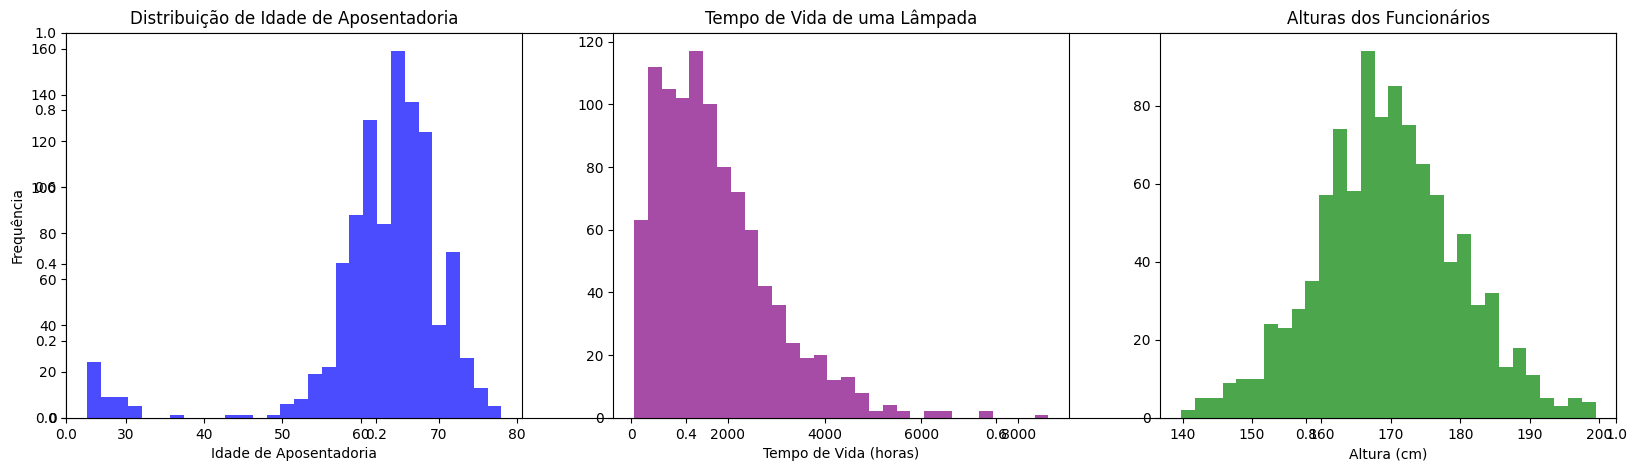

In [28]:
plt.subplots(figsize=(20, 5))
plt.subplot(131)
plt.title('Distribuição de Idade de Aposentadoria')
plt.xlabel('Idade de Aposentadoria')
plt.ylabel('Frequência')
plt.hist(dados_idade_aposentadoria, bins=30, alpha=0.7, color='blue')

plt.subplot(132)
plt.hist(dados_vida_lampada, bins=30, alpha=0.7, color='purple')
plt.title('Tempo de Vida de uma Lâmpada')
plt.xlabel('Tempo de Vida (horas)')

plt.subplot(133)
plt.hist(dados_alturas, bins=30, alpha=0.7, color='green')
plt.title('Alturas dos Funcionários')
plt.xlabel('Altura (cm)')

plt.show()

In [29]:
# Reamostragens

# tamanho da amostra
n =100

# quantidade de amostras
qnt =100000

# função de reamostragem e cálculo de médias
def reamostragem__media(dados, coluna, n , qnt):
    medias = [dados[coluna].sample(n, replace=True).mean() for _ in range(qnt)]
    return medias

In [30]:
# Realizando as reamostragens com a função

media_alturas = reamostragem__media(dados_alturas, 'alturas', n, qnt)
media_idade = reamostragem__media(dados_idade_aposentadoria, 'idade', n, qnt)
media_duracao = reamostragem__media(dados_vida_lampada, 'duracao', n, qnt)

In [31]:
dados_vida_lampada.head()

,duracao
0,2238.462196
1,404.474833
2,358.025869
3,2193.463611
4,1072.377941


In [32]:
print("*****  Médias populacionais *****")

print("Média de Altura: ", dados_alturas['alturas'].mean())
print("Média de Idade: ", dados_idade_aposentadoria['idade'].mean()) 
print("Média de Duração: ", dados_vida_lampada['duracao'].mean())

*****  Médias populacionais *****
Média de Altura:  169.52022
Média de Idade:  62.70857142857143
Média de Duração:  1731.8036029420002


In [33]:
def Average(lst):
    return sum(lst) / len(lst)

print("*****  Médias pamostrais *****")

print("Média de Altura: ", Average(dados_alturas['alturas']))
print("Média de Idade: ", Average(dados_idade_aposentadoria['idade']))
print("Média de Duração: ", Average(dados_vida_lampada['duracao']))

*****  Médias pamostrais *****
Média de Altura:  169.52022000000002
Média de Idade:  62.70857142857143
Média de Duração:  1731.803602942


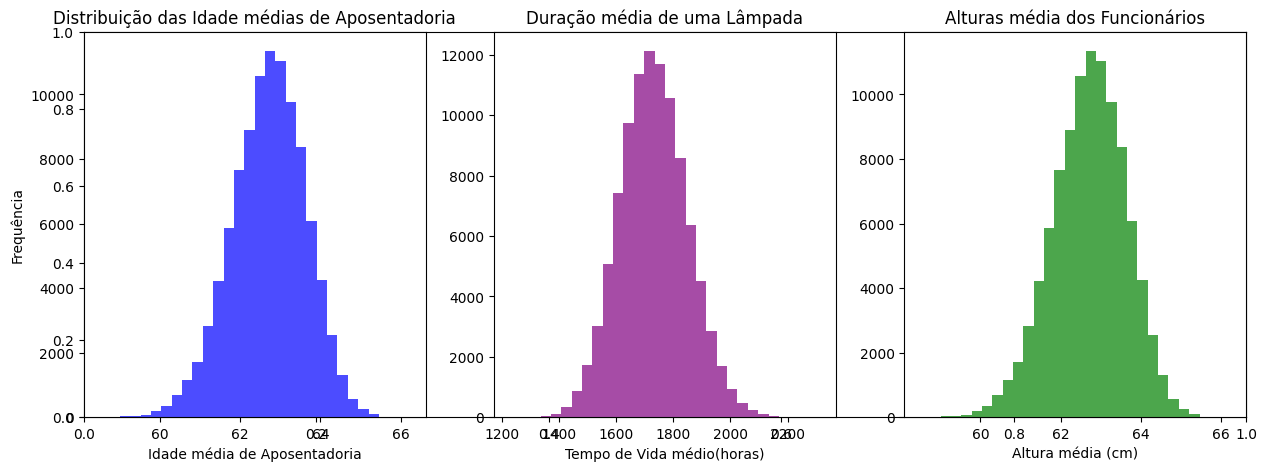

In [34]:
plt.subplots(figsize=(15, 5))
plt.subplot(131)
plt.title('Distribuição das Idade médias de Aposentadoria')
plt.xlabel('Idade média de Aposentadoria')
plt.ylabel('Frequência')
plt.hist(media_idade, bins=30, alpha=0.7, color='blue')

plt.subplot(132)
plt.hist(media_duracao, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio(horas)')

plt.subplot(133)
plt.hist(media_idade, bins=30, alpha=0.7, color='green')
plt.title('Alturas média dos Funcionários')
plt.xlabel('Altura média (cm)')

plt.show()

In [35]:
# média da nova amostra
media_nova_amostra = 1200

In [36]:
# media original

print("Média de Duração: ", dados_vida_lampada['duracao'].mean())

Média de Duração:  1731.8036029420002


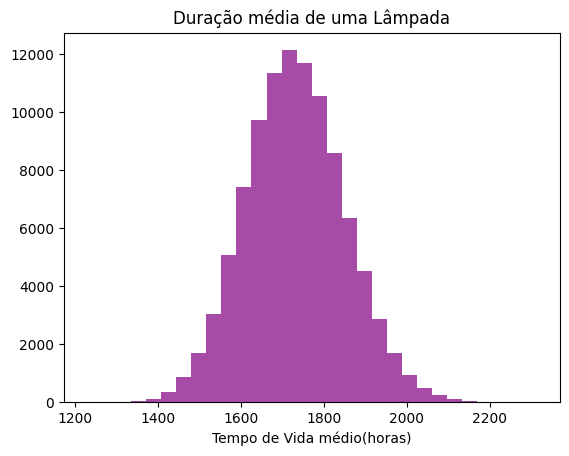

In [37]:
# Quão distante essa média está do comportamento?

plt.hist(media_duracao, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio(horas)')
plt.show()

In [38]:
# transformando medias_duração em DataFrame
duracao_amostras = pd.DataFrame({'medias_duracao': media_duracao})

In [39]:
# calculando informações
media_das_medias = duracao_amostras['medias_duracao'].mean()
EP = duracao_amostras['medias_duracao'].std()

print("*****  Medidas amostrais *****")
print("média:", media_das_medias )
print("Erro Padrão:", EP )

*****  Medidas amostrais *****
média: 1731.9820167137893
Erro Padrão: 118.2780303855334


In [40]:
# Quantos erros?

1731 - EP

np.float64(1612.7219696144666)

In [41]:
1731 - 3 * EP

np.float64(1376.1659088433998)

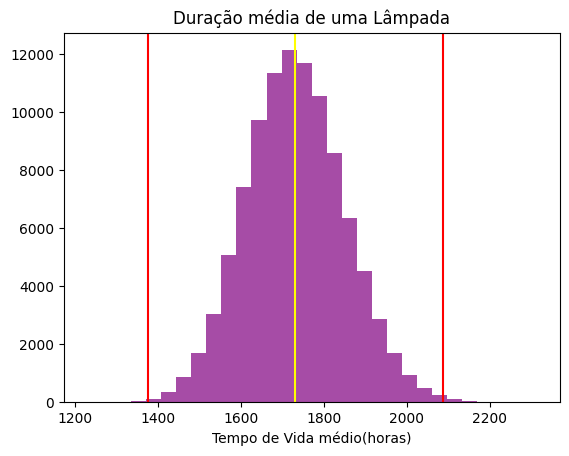

In [42]:
# Visualizando a quantidade de amostras entre 3EP +- da média.

plt.hist(media_duracao, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio(horas)')
plt.axvline(media_das_medias, color='yellow')
plt.axvline(media_das_medias + 3 * EP , color='red')
plt.axvline(media_das_medias - 3 * EP , color='red')
plt.show()

In [43]:
#quanto está no intervalo de +ou- 3 EP?
qnt_obs = duracao_amostras [(duracao_amostras > media_das_medias - 3 * EP) & (duracao_amostras < media_das_medias + 3 * EP)]

In [44]:
# quanto isso representa?
qnt_obs.count() / duracao_amostras.count()*100

medias_duracao    99.714
dtype: float64

In [45]:
#importando scipy
from scipy import stats

In [46]:


# levar em consideração essa amostra
dados_vida_lampada

# nível de confiança definido
confianca = 0.95

In [47]:
#informações para o IC

media = dados_vida_lampada['duracao'].mean()
desvio_padrao_amostra = dados_vida_lampada['duracao'].std()
tamanho_amostra = len(dados_vida_lampada)

In [48]:
# Calculando intervalo de confiança

intervalo_confianca = stats.norm.interval(confianca, loc=media, scale=desvio_padrao_amostra/np.sqrt(tamanho_amostra))

In [49]:
# intervalo de confiança 
print (' IC (95%) ', float(intervalo_confianca[0]))

 IC (95%)  1658.3741665835487


In [50]:
# hipotese nula

hipotese_nula = 1570


In [51]:
# dados amostrais

experimento_lampas_natalinas = pd.read_csv("C:\\Users\\denis\\Documents\\anls_lamps\\alura-analise-dados\lamp_altura_apo\\experimento_lampadas_natalinas.csv")


#média amostral
experimento_lampas_natalinas['duracao'].mean()

np.float64(1529.5081310675512)

In [52]:
#informações para a região crítica

confianca = 0.95 
desvio_padrao_amostra_lampas = 105
tamanho_amostra_lampas = len(experimento_lampas_natalinas)
print(tamanho_amostra_lampas)

100


In [53]:
#calculando o IC

# Calculando intervalo de confiança

intervalo_confianca_lampas = stats.norm.interval(confianca, loc=105, scale=desvio_padrao_amostra_lampas/np.sqrt(tamanho_amostra_lampas))
print(" IC de (95%) : ", float(intervalo_confianca_lampas[0]), " - ", float(intervalo_confianca_lampas[1]))

#Regeitando a hipotese nula.

 IC de (95%) :  84.42037816232943  -  125.57962183767057


In [54]:
# nível de significancia: quando você rejeita erroneamente a hipótese nula quando ela é realmente verdadeira.

In [62]:
#importando o teste Z do statsmodels

from statsmodels.stats.weightstats import ztest

In [ ]:
#Executando o teste z

stats, p_valor = ztest(x1 = experimento_lampas_natalinas['duracao'] , value = 1570, alternative= 'two-sided')

In [68]:
# média amostral
experimento_lampas_natalinas['duracao'].mean()

np.float64(1529.5081310675512)

In [70]:
# Exibe os resultados
print(float(p_valor))

0.0


In [71]:
# Verifica a hipótese nula com base no valor-p


if p_valor < 0.05:
    conclusao = "Rejeitar a hipótese nula"
else:
    conclusao = "Não rejeita a hipótese nula"


print("Conclusão:", conclusao)

Conclusão: Rejeitar a hipótese nula


In [ ]:
# Tempo de resposta em minutos para 25 solicitações de suporte
tempo_resposta = [28, 32, 29, 31, 30, 33, 28, 30, 31, 29,
                  30, 32, 29, 31, 30, 33, 28, 30, 31, 29,
                  30, 32, 24, 29, 30]

In [ ]:
#média coletada do tempo